In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline

data = pd.read_csv('./drive/MyDrive/Iris.csv')
data['Species'] = data['Species'].map({'iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
feature = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target = data['Species']
n_neighbors = 3
r_state = 0
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=r_state)
print(len(feature))
print(len(np.unique(target)))

150
3


In [36]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
nca = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=r_state))
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
dim_reduction_methods = [('PCA', pca), ('Lda', lda), ('NCA', nca)]

target_train = target_train.dropna()
target_test = target_test.dropna()

nca2 = make_pipeline(StandardScaler(), NeighborhoodComponentsAnalysis(n_components=2, random_state=r_state), KNeighborsClassifier(n_neighbors=n_neighbors))
nca2.fit(feature_train, target_train)
print(nca2.score(feature_train, target_train))
print(nca2.score(feature_test, target_test))

0.9859154929577465
0.896551724137931


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

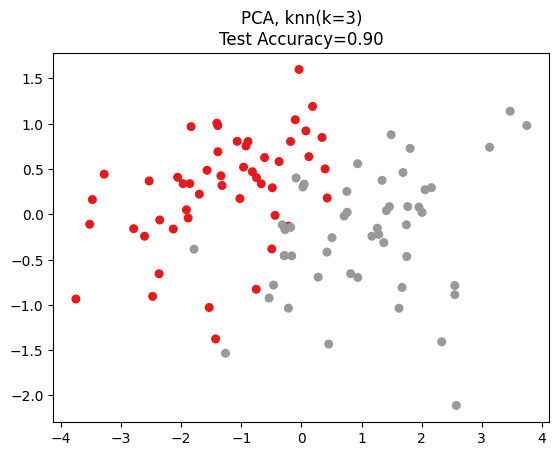

<Figure size 640x480 with 0 Axes>

In [37]:
for i, (name, model) in enumerate(dim_reduction_methods):
  plt.figure()
  model.fit(feature_train, target_train)
  knn.fit(model.transform(feature_train), target_train)
  acc_knn = knn.score(model.transform(feature_test), target_test)
  feature_embedded = model.transform(feature)
  plt.scatter(feature_embedded[:, 0], feature_embedded[:, 1], c=target, s=30, cmap='Set1')
  plt.title('{}, knn(k={})\nTest Accuracy={:.2f}'.format(name, n_neighbors, acc_knn))

In [18]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
import pandas as pd
feature = pd.DataFrame(data.data)
target = pd.DataFrame(data.target)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)
ss = MinMaxScaler()
feature_train = ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(feature_train, target_train)
print(clf.score(feature_train, target_train))
print(clf.score(feature_test, target_test))

0.9874371859296482
0.9707602339181286


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Text(0, 0.5, 'Accuracy')

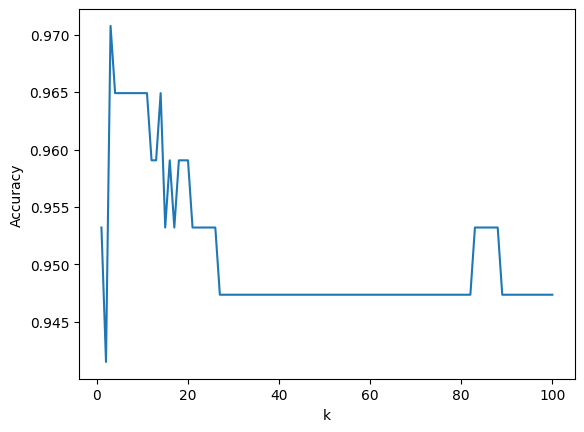

In [27]:
import matplotlib.pyplot as plt
k_list = range(1, 101)
accuracies =[]
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(feature_train, target_train)
  accuracies.append(knn.score(feature_test, target_test))

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')

In [28]:
for k in range(20):
  knn = KNeighborsClassifier(n_neighbors=k+1)
  knn.fit(feature_train, target_train)
  print(knn.score(feature_train, target_train))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

1.0
0.9849246231155779
0.9874371859296482
0.9849246231155779
0.9748743718592965
0.9748743718592965
0.9824120603015075
0.9773869346733668
0.9773869346733668


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

0.9798994974874372
0.9673366834170855
0.9748743718592965
0.9723618090452262
0.9773869346733668
0.9723618090452262
0.9698492462311558
0.9698492462311558
0.964824120603015
0.9673366834170855
0.9698492462311558


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
